# 7.7. Fitting a Bayesian model by sampling from a posterior distribution with a Markov Chain Monte Carlo method

In [2]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 860kB 5.4MB/s eta 0:00:01
     |████████████████████████████████| 2.8MB 8.2MB/s eta 0:00:01
  Stored in directory: /Users/okara/Library/Caches/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built theano


In [3]:
# www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'Allstorms.ibtracs_wmo.v03r05.csv?'
                 'raw=true',
                 delim_whitespace=False)

In [4]:
cnt = df[df['Basin'] == ' NA'].groupby(
    'Season')['Serial_Num'].nunique()
# The years from 1851 to 2012.
years = cnt.index
y0, y1 = years[0], years[-1]
arr = cnt.values

Text(0, 0.5, 'Number of storms')

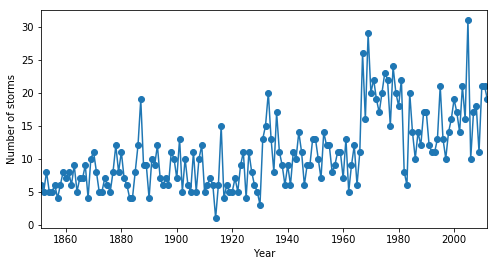

In [5]:
# Plot the annual number of storms.
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(years, arr, '-o')
ax.set_xlim(y0, y1)
ax.set_xlabel("Year")
ax.set_ylabel("Number of storms")

In [6]:
# We define our model.
with pm.Model() as model:
    # We define our three variables.
    switchpoint = pm.DiscreteUniform(
        'switchpoint', lower=y0, upper=y1)
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)
    # The rate of the Poisson process is a piecewise
    # constant function.
    rate = pm.math.switch(switchpoint >= years,
                          early_rate, late_rate)
    # The annual number of storms per year follows
    # a Poisson distribution.
    storms = pm.Poisson('storms', rate, observed=arr)

In [ ]:
with model:
    trace = pm.sample(10000)

In [ ]:
pm.traceplot(trace)

In [ ]:
s = trace['switchpoint'].mean()
em = trace['early_rate'].mean()
lm = trace['late_rate'].mean()
s, em, lm

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(years, arr, '-o')
ax.axvline(s, color='k', ls='--')
ax.plot([y0, s], [em, em], '-', lw=3)
ax.plot([s, y1], [lm, lm], '-', lw=3)
ax.set_xlim(y0, y1)
ax.set_xlabel("Year")
ax.set_ylabel("Number of storms")